In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
from keras.layers import Dropout

# construction a model with dropout layer
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
# hyperparameters 
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.3,0.5,0.7,0.9]

In [5]:
# training with different dropout ratio

results = {} # for plotting later
for dp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout ration = %.6f" % (dp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio = dp_ratio)
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(dp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout ration = 0.300000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 20s 403us/step - loss: 2.2195 - acc: 0.1771 - val_loss: 2.0153 - val_acc: 0.2912
Epoch 2/30
50000/50000 [==============================] - 17s 336us/step - loss: 2.0287 - acc: 0.2525 - val_loss: 1.8930 - val_acc: 0.3368
Epoch 3/30
50000/50000 [==============================] - 14s 276us/step - loss: 1.9400 - acc: 0.2943 - val_loss: 1.8284 - val_acc: 0.3589
Epoch 4/30
50000/50000 [==============================] - 13s 261us/step - loss: 1.8849 - acc: 0.3134 - val_loss: 1.7785 - val_acc: 0.3711
Epoch 5/30
50000/50000 [==============================] - 12s 246us/step - loss: 1.8467 - acc: 0.3330 - val_loss: 1.7

50000/50000 [==============================] - 12s 234us/step - loss: 1.7684 - acc: 0.3600 - val_loss: 1.6346 - val_acc: 0.4246
Epoch 22/30
50000/50000 [==============================] - 12s 233us/step - loss: 1.7623 - acc: 0.3658 - val_loss: 1.6321 - val_acc: 0.4266
Epoch 23/30
50000/50000 [==============================] - 12s 234us/step - loss: 1.7540 - acc: 0.3691 - val_loss: 1.6168 - val_acc: 0.4308
Epoch 24/30
50000/50000 [==============================] - 12s 238us/step - loss: 1.7445 - acc: 0.3720 - val_loss: 1.6079 - val_acc: 0.4368
Epoch 25/30
50000/50000 [==============================] - 12s 237us/step - loss: 1.7349 - acc: 0.3743 - val_loss: 1.6042 - val_acc: 0.4255
Epoch 26/30
50000/50000 [==============================] - 12s 239us/step - loss: 1.7291 - acc: 0.3774 - val_loss: 1.5876 - val_acc: 0.4446
Epoch 27/30
50000/50000 [==============================] - 12s 238us/step - loss: 1.7190 - acc: 0.3815 - val_loss: 1.5954 - val_acc: 0.4360
Epoch 28/30
50000/50000 [=======

50000/50000 [==============================] - 12s 232us/step - loss: 2.3028 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 12s 232us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 20/30
50000/50000 [==============================] - 12s 232us/step - loss: 2.3027 - acc: 0.0962 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 21/30
50000/50000 [==============================] - 12s 236us/step - loss: 2.3026 - acc: 0.0963 - val_loss: 2.3026 - val_acc: 0.0998
Epoch 22/30
50000/50000 [==============================] - 12s 242us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 23/30
50000/50000 [==============================] - 12s 235us/step - loss: 2.3027 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 24/30
50000/50000 [==============================] - 12s 236us/step - loss: 2.3027 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 25/30
50000/50000 [=======

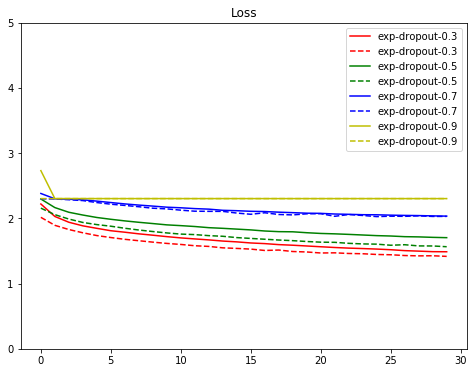

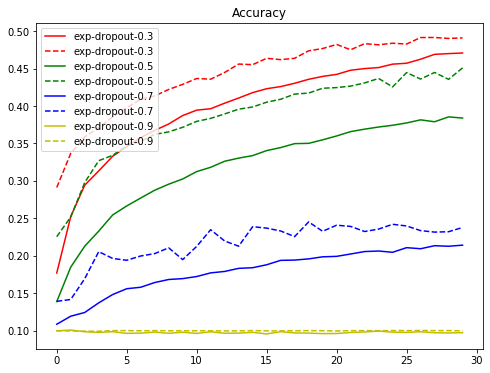

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [7]:
# using Adam as optimizer for training

results = {} # for plotting later
for dp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout ration = %.6f" % (dp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio = dp_ratio)
    # model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(dp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout ration = 0.300000
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 328us/step - loss: 2.1017 - acc: 0.2234 - val_loss: 1.8733 - val_acc: 0.3311
Epoch 2/30
50000/50000 [==============================] - 14s 279us/step - loss: 1.9205 - acc: 0.3006 - val_loss: 1.7684 - val_acc: 0.3757
Epoch 3/30
50000/50000 [==============================] - 14s 280us/step - loss: 1.8696 - acc: 0.3190 - val_loss: 1.7510 - val_acc: 0.3691
Epoch 4/30
50000/50000 [==============================] - 14s 281us/step - loss: 1.8337 - acc: 0.3329 - val_loss: 1.7535 - val_acc: 0.3787
Epoch 5/30
50000/50000 [==============================] - 14s 282us/step - loss: 1.8114 - acc: 0.3456 - val_loss: 1.7094 - val_acc: 0.4028
Epoch 6/30
50000/50000 [==============================] - 14s 283us/step - loss: 1.7929 - acc: 0.3495 - val_loss: 1.7166 - val_acc: 0.3933
Epoch 7/30
50000/50000 [==============================] - 14s 283us/step -

/Users/vincent/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148901). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 345us/step - loss: 1.6188 - acc: 0.4180 - val_loss: 1.5616 - val_acc: 0.4448
Experiment with Dropout ration = 0.500000
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 17s 333us/step - loss: 2.2177 - acc: 0.1634 - val_loss: 2.0553 - val_acc: 0.2297
Epoch 2/30
50000/50000 [==============================] - 15s 295us/step - loss: 2.1105 - acc: 0.1896 - val_loss: 2.0247 - val_acc: 0.2476
Epoch 3/30
50000/50000 [==============================] - 14s 286us/step - loss: 2.0977 - acc: 0.1971 - val_loss: 2.0471 - val_acc: 0.2493
Epoch 4/30
50000/50000 [==============================] - 15s 291us/step - loss: 2.0928 - acc: 0.1939 - val_loss: 2.0242 - val_acc: 0.2384
Epoch 5/30
50000/50000 [==============================] - 16s 313us/step - loss: 2.0705 - acc: 0.2036 - val_loss: 2.0435 - val_acc: 0.2484
Epoch 6/30
50000/50000 [==============================] - 17s 339us/step - loss: 2.04

50000/50000 [==============================] - 14s 275us/step - loss: 2.3027 - acc: 0.0960 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 28/30
50000/50000 [==============================] - 14s 275us/step - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 29/30
50000/50000 [==============================] - 14s 281us/step - loss: 2.3027 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 30/30
50000/50000 [==============================] - 14s 276us/step - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Experiment with Dropout ration = 0.900000
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 293us/step - loss: 13.2006 - acc: 0.1028 - val_loss: 2.9234 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 14s 286us/step - loss: 3.2182 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 3/30
50000/50000 [==============================] - 15s 291us/step - loss: 

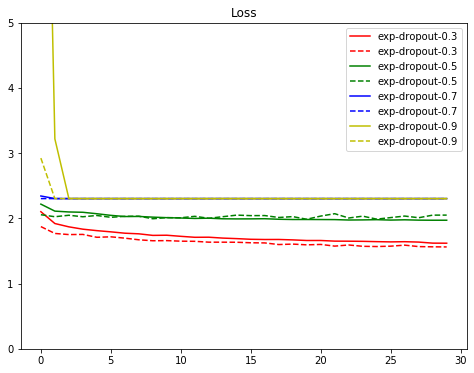

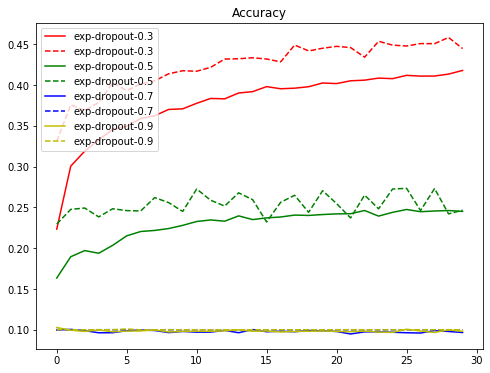

In [8]:
# plotting
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()